# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Grosse Veränderungen der Säuglingssterblichkeiten
### 1.2 Gruppe:
- Valeria Schönyan, Jessica Schmid, Simon Mettler
### 1.3 Fragestellung:
- Welche Länder hatten seit 1990 die grösste Zunahme/Abnahme der Sterblichkeit bei Säuglingen (< 1 Jahr)?
- Was sind die Gründe dafür?   
### 1.4 Datenquelle(n):
- https://ourworldindata.org/grapher/infant-mortality?tab=table&country=USA~MEX~DEU~ZAF




### 1.5 Daten beschaffen und laden

In [63]:


import pandas as pd


In [64]:


df = pd.read_csv('infant-mortality.csv', skiprows=1,
                 names=['Land','Code','Jahr','Sterblichkeit']) 
df  

,Land,Code,Jahr,Sterblichkeit
0,Afghanistan,AFG,1957,26.094225
1,Afghanistan,AFG,1958,25.776396
2,Afghanistan,AFG,1959,25.467907
3,Afghanistan,AFG,1960,25.123142
4,Afghanistan,AFG,1961,24.839281
...,...,...,...,...
13572,Zimbabwe,ZWE,2019,4.596266
13573,Zimbabwe,ZWE,2020,4.489809
13574,Zimbabwe,ZWE,2021,4.362161
13575,Zimbabwe,ZWE,2022,4.222358


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [65]:
df_pivot = df.pivot_table(
    index='Land',
    columns='Jahr',
    values='Sterblichkeit',
    aggfunc='mean'
)


df_pivot.head()

Jahr,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Land,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.635821,6.421486,6.225403,6.040129,5.863033,5.693236,5.528115,5.364005,5.198535,5.036440
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.958952,4.859064,4.756677,4.668392,4.474101,4.363954,4.240653,4.145499,4.101093,3.931096
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.776530,0.762981,0.761810,0.769265,0.781825,0.797022,0.811845,0.824619,0.831452,0.831589
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.230713,2.193941,2.159699,2.127168,2.096677,2.067920,2.042712,2.017561,1.996700,1.974315
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.352169,0.335916,0.320248,0.306298,0.294897,0.284046,0.273821,0.265141,0.256313,0.247736


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [66]:
print('Anzahl verschiedener Länder: ', len(df['Land'].unique()))

Anzahl verschiedener Länder:  212


In [67]:

df['Land'].value_counts()

Land
Ghana                            92
Brazil                           90
Guinea                           87
Fiji                             84
Samoa                            84
                                 ..
High-income countries            34
Low-income countries             34
Lower-middle-income countries    34
Upper-middle-income countries    34
World                            34
Name: count, Length: 212, dtype: int64

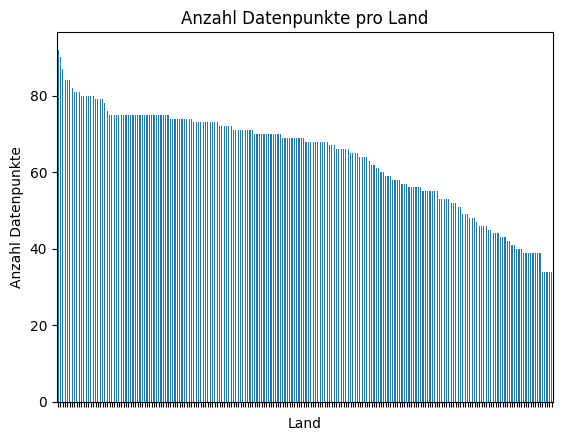

In [68]:
ax = df['Land'].value_counts().plot(kind='bar', ylabel='Anzahl Datenpunkte', title="Anzahl Datenpunkte pro Land")
ax.set_xticklabels([]);

## 3.2 Analyse Jahr

In [69]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  92


In [101]:

df['Jahr'].value_counts().sort_index()

Jahr
1932      1
1933      1
1934      2
1935      2
1936      2
       ... 
2019    212
2020    212
2021    212
2022    212
2023    212
Name: count, Length: 92, dtype: int64

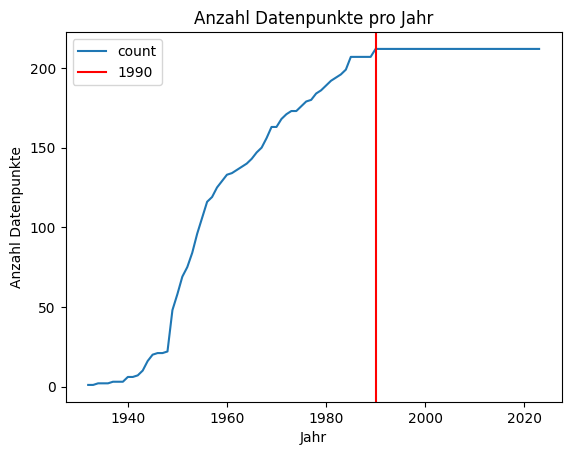

In [71]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1990, color='red',label='1990')
g.legend()

## 3.3 Analyse Säuglingssterblichkeit

In [72]:
df.describe()

,Jahr,Sterblichkeit
count,13577.000000,13577.000000
mean,1990.145909,5.332074
std,20.448355,4.911552
min,1932.000000,0.136684
25%,1974.000000,1.479416
50%,1991.000000,3.687661
75%,2007.000000,7.984322
max,2023.000000,47.249640


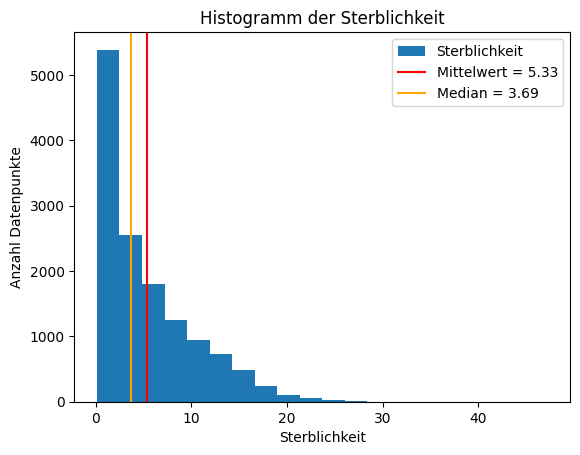

In [73]:
g = df['Sterblichkeit'].plot(kind='hist', bins=20, title='Histogramm der Sterblichkeit', 
                           xlabel='Sterblichkeit', ylabel='Anzahl Datenpunkte')
mean = df['Sterblichkeit'].mean()
g.axvline(x=df['Sterblichkeit'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  

median = df['Sterblichkeit'].median()
g.axvline(x=df['Sterblichkeit'].median(), color='orange',label=  f'Median = {median:.2f}')  

g.legend()

In [ ]:
df_pivot= df.pivot(index="Jahr", columns="Land", values="Sterblichkeit").dropna().T
df_pivot

Jahr,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Land,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.451245,14.010447,13.589371,13.199313,12.831206,12.484998,12.173503,11.880489,11.588675,11.299543,...,6.635821,6.421486,6.225403,6.040129,5.863033,5.693236,5.528115,5.364005,5.198535,5.036440
Africa,9.166047,9.228770,9.143317,8.891736,8.857553,8.654798,8.521814,8.367100,8.255010,7.975657,...,4.958952,4.859064,4.756677,4.668392,4.474101,4.363954,4.240653,4.145499,4.101093,3.931096
Albania,2.723393,2.598748,2.496602,2.398473,2.308999,2.220738,2.134803,2.046775,1.959723,1.872171,...,0.776530,0.762981,0.761810,0.769265,0.781825,0.797022,0.811845,0.824619,0.831452,0.831589
Algeria,3.981612,3.962292,3.956520,3.946714,3.920526,3.878605,3.817615,3.743018,3.660487,3.569038,...,2.230713,2.193941,2.159699,2.127168,2.096677,2.067920,2.042712,2.017561,1.996700,1.974315
Andorra,0.907760,0.882809,0.857761,0.839083,0.816381,0.791014,0.760437,0.735048,0.708204,0.681073,...,0.352169,0.335916,0.320248,0.306298,0.294897,0.284046,0.273821,0.265141,0.256313,0.247736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,3.715780,3.545835,3.366996,3.186591,3.008845,2.839984,2.679584,2.531447,2.394120,2.273776,...,1.576763,1.558351,1.539100,1.521227,1.504791,1.488581,1.470099,1.450735,1.427893,1.401164
World,6.396339,6.415245,6.344118,6.223381,6.144494,6.030073,5.913023,5.785127,5.666787,5.496969,...,3.248197,3.175676,3.078690,3.004245,2.947376,2.886668,2.854891,2.812903,2.795746,2.707851
Yemen,9.657782,9.432410,9.240110,9.073315,8.924987,8.787016,8.634995,8.453329,8.209943,7.918391,...,4.148662,4.132932,4.047979,3.972018,3.955774,3.877089,3.736167,3.668548,3.569622,3.465089


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Beobachtungen

Ab 1990 haben alle 212 Länder Daten zur Säuglingssterblichkeitsrate vor. 
Die fünf Länder mit dem höchsten Rückgang der Säuglingssterblichkeit (ein Tot auf 100 Lebendgeburten) zwischen 1990 und 2023 sind:
East Timor, Liberia, Malawi, Mozambique, Afghanistan

Die fünf Länder mit dem geringsten Rückgang in diesem Zeitraum sind:
Seychelles, Niue, Botswana, Fiji, Dominica

### Interpretation

Allgemeine Entwicklung
Die fünf Länder East Timor, Liberia, Malawi, Mosambik und Afghanistan wiesen 1990 sehr hohe Säuglingssterblichkeitsraten auf, konnten diese jedoch in den folgenden Jahrzehnten deutlich senken. Verantwortlich dafür waren vor allem der Ausbau der medizinischen Versorgung, umfangreiche Impfprogramme sowie internationale Unterstützung durch Organisationen wie UNICEF und WHO, die unter anderem Ernährungsprogramme, Schwangerenvorsorge und Maßnahmen zur Betreuung von Neugeborenen förderten. Dadurch kam es insgesamt zu einem kontinuierlichen und langfristigen Rückgang der Sterblichkeit.

Kriesenbedingte Ausschläge in der Statistik:
In einigen Jahren zeigen sich jedoch markante Ausschläge, die sich auf politische oder gesundheitliche Krisen zurückführen lassen. Besonders deutlich wird dies im Fall von East Timor im Jahr 1999, als es im Zuge des Unabhängigkeitsreferendums gegenüber Indonesien zu schweren gewaltsamen Auseinandersetzungen und zur Zerstörung eines Großteils der Infrastruktur, einschließlich vieler Krankenhäuser, kam. Die damit einhergehende humanitäre Krise führte zu einem vorübergehenden Anstieg der Säuglingssterblichkeit, der jedoch im Jahr darauf wieder deutlich sank. Mit der Unabhängigkeit im Jahr 2002 erhielt das Land zudem umfangreiche internationale Unterstützung beim Wiederaufbau seines Gesundheitssektors, was den langfristigen Rückgang weiter begünstigte.

Ein ähnliches Muster zeigt sich 2014 in Liberia, wo die Ebola-Epidemie zu einer erheblichen Überlastung des Gesundheitssystems führte. Viele Kliniken mussten schließen oder konnten nur eingeschränkt arbeiten, und die pränatale sowie neonatale Versorgung verschlechterte sich stark. Dieser Zusammenbruch der medizinischen Versorgung schlug sich in einem vorübergehenden Anstieg der Säuglingssterblichkeit nieder. 

Malawi wiederum profitierte besonders von umfangreichen Programmen zur Bekämpfung von HIV/AIDS, die unter anderem die Übertragung des Virus von Müttern auf ihre Kinder reduzierten und so einen deutlichen Rückgang der Säuglingssterblichkeit unterstützten. Trotz solcher krisenbedingten Ausschläge zeigt die langfristige Entwicklung in allen fünf Ländern einen klaren und nachhaltigen Rückgang der Säuglingssterblichkeit, der sowohl auf nationale Verbesserungen im Gesundheitssektor als auch auf internationale Unterstützung zurückzuführen ist.

Allgemeine Entwicklung
Wohlhabende oder politisch stabile Länder wie die Seychellen, Niue, Botswana, Fiji und Dominica weisen vergleichsweise niedrige Säuglingssterblichkeitsraten auf. In diesen Ländern ist das absolute Reduktionspotenzial begrenzt, da bereits ein hohes Versorgungsniveau besteht. Zudem zeichnen sie sich durch stabile politische Verhältnisse, gut ausgebaute Gesundheitssysteme und einen hohen Lebensstandard aus. Besonders in den Seychellen und in Fiji sind der Zugang zu medizinischer Versorgung, Bildung und sauberem Wasser bereits sehr gut, was die niedrige und stabile Säuglingssterblichkeit erklärt.

Kriesenbedingte Ausschläge in der Statistik:
In Botswana zeigte sich 2011 ein Anstieg der Säuglingssterblichkeit aufgrund der HIV-Epidemie. Seitdem sank die Rate kontinuierlich auf 3,8 % im Jahr 2023, was eine leichte Verbesserung gegenüber 1990 (3,9 %) darstellt.

Dominica begann mit einer sehr niedrigen Rate von 1,5 %, verzeichnet jedoch bis 2023 einen Anstieg auf 3,3 % – den größten relativen Zuwachs unter den betrachteten Ländern. Mögliche Ursachen sind die begrenzten Ressourcen der kleinen Insel sowie die wiederholte Betroffenheit durch tropische Stürme und Hurrikane.

In vielen Pazifikstaaten führten die 1990er-Jahre zu einer Verbesserung der Impfprogramme und der Basisversorgung, was initial zu sinkender Säuglingssterblichkeit in Fiji beitrug. Der erneute Anstieg lässt sich durch Naturereignisse wie Zyklone, Dürreperioden, Überschwemmungen und Erkrankungen wie Dengue erklären, die die Gesundheitssituation negativ beeinflussten.

Niue ist extrem klein; schon wenige zusätzliche Todesfälle in einzelnen Jahren, beispielsweise durch Infektionsausbrüche oder Versorgungsprobleme nach Stürmen, können die Rate deutlich schwanken lassen, ohne dass sich ein dauerhafter Trend abzeichnet.

Die Seychellen verfügen im regionalen Vergleich über ein relativ stabiles, gut ausgebautes Gesundheitssystem mit hoher Versorgungsdichte. Dies erklärt das insgesamt niedrige und kaum schwankende Niveau der Säuglingssterblichkeit. Obwohl der Inselstaat ebenfalls Naturkatastrophen und klimaempfindlichen Erkrankungen ausgesetzt ist, sorgen höhere Einkommen und eine gute Infrastruktur dafür, dass solche Ereignisse nur geringe Auswirkungen auf die Säuglingssterblichkeit haben.

### Berechnungen

In [80]:
diffs = df_pivot.loc[2023] - df_pivot.loc[1990]
diffs = diffs.sort_values(ascending = False).dropna()
diffs

Land
Dominica        1.817988
Fiji            0.245671
Niue            0.018783
Seychelles      0.000091
Botswana       -0.067191
                 ...    
Afghanistan    -9.414805
Mozambique    -10.131519
Malawi        -10.374857
Liberia       -11.702428
East Timor    -12.842799
Length: 212, dtype: float64

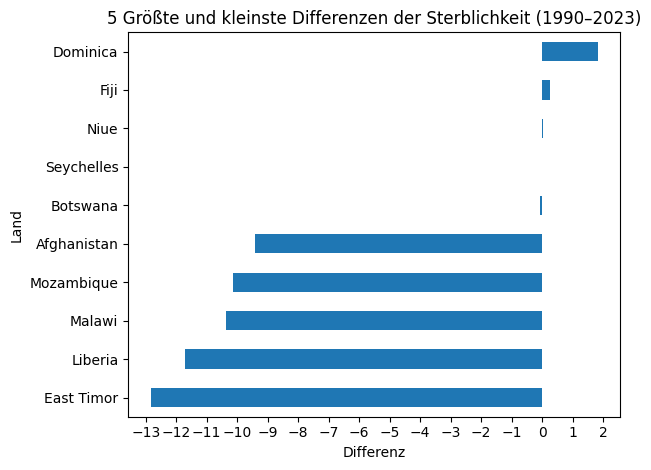

In [102]:

import numpy as np
import matplotlib.pyplot as plt

worst_5 = diffs.nsmallest(5)
best_5  = diffs.nlargest(5)

extreme_10 = pd.concat([worst_5, best_5])

ax = extreme_10.sort_values().plot(
    kind="barh",
    width=0.5,   # <-- statt height
    title="5 Größte und kleinste Differenzen der Sterblichkeit (1990–2023)",
    xlabel="Differenz",
    ylabel="Land"
)

# X-Achsen-Abstand setzen
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.arange(int(xmin), int(xmax) + 1, 1))

plt.tight_layout()
plt.show()

In [99]:
Länder_liste = extreme_10[diff_sel].index.tolist()  
print(Länder_liste)

['East Timor', 'Liberia', 'Malawi', 'Mozambique', 'Afghanistan', 'Dominica', 'Fiji', 'Niue', 'Seychelles', 'Botswana']


Text(1999.5, 5, 'East Timor Crisis')

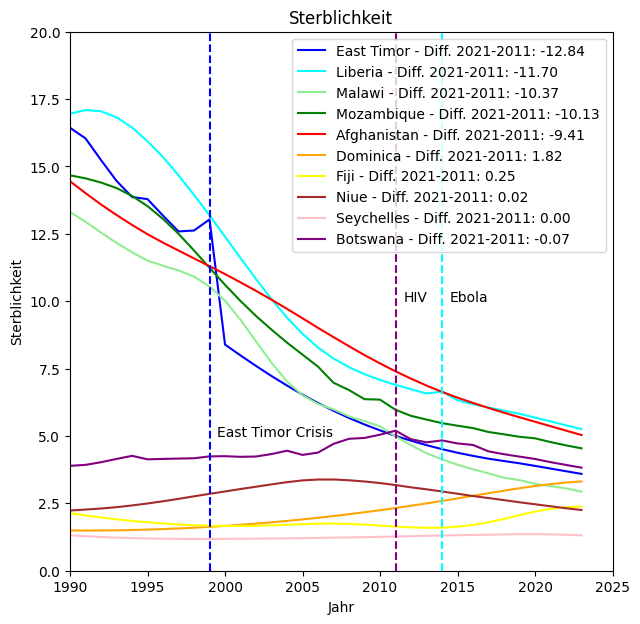

In [113]:
color_dict = {
    'East Timor': 'blue',
    'Liberia': 'cyan',
    'Malawi': 'lightgreen',
    'Mozambique': 'green',
    'Afghanistan': 'red',
    'Dominica': 'orange',
    'Fiji': 'yellow',
    'Niue': 'brown',
    'Seychelles': 'pink',
    'Botswana': 'purple'
}

for Land in Länder_liste:
    diff = diffs[Land]
    g = df_pivot.loc[Land].plot(title='Sterblichkeit', xlabel='Jahr', ylabel=f'Sterblichkeit', legend=True,
                                  label=f'{Land} - Diff. 2021-2011: {diff:.2f}', # für die Legende
                                  xlim=[1990,2025], ylim=[0,20],   # x- und y-Achsen begrenzen
                                  color=color_dict[Land],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

# Liberia Ebola Epidemie    
g.axvline(x=2014, color='cyan', linestyle='--') 
g.text(2014.5, 10, 'Ebola')  

# HIV Pandemie
g.axvline(x=2011, color='purple', linestyle='--')  
g.text(2011.5, 10, 'HIV');

# East Timor Krise    
g.axvline(x=1999, color='blue', linestyle='--') 
g.text(1999.5, 5, 'East Timor Crisis')